# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Statements

In [2]:
import requests
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Parse Visual Crossing Weather txt File

In [37]:
weather_df = pd.read_csv('/content/drive/My Drive/Bus Watcher Spec Project/Projects/Alex Amy + Sanket Shah/Data/Weather/vc_weather_data_raw.txt')

In [38]:
weather_df

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Contributing Stations,Weather Type,Conditions
0,"New York, NY, United States",07/31/2021 23:51:00,21.2,21.2,21.2,NaN,NaN,0.0,NaN,0.0,NaN,16.0,0.0,59.10,KNYC (6.6KM),NaN,Clear
1,"New York, NY, United States",08/01/2021 00:51:00,20.7,20.7,20.7,NaN,NaN,0.0,NaN,5.4,NaN,16.0,0.0,62.97,KNYC (6.6KM),NaN,Clear
2,"New York, NY, United States",08/01/2021 01:51:00,21.2,21.2,21.2,NaN,NaN,0.0,NaN,5.4,NaN,16.0,0.0,61.06,KNYC (6.6KM),NaN,Clear
3,"New York, NY, United States",08/01/2021 02:51:00,20.7,20.7,20.7,NaN,NaN,0.0,NaN,0.0,NaN,16.0,0.0,62.97,KNYC (6.6KM),NaN,Clear
4,"New York, NY, United States",08/01/2021 03:51:00,19.4,19.4,19.4,NaN,NaN,0.0,NaN,5.4,NaN,16.0,0.0,72.82,KNYC (6.6KM),NaN,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159951,"New York, NY, United States",09/30/2021 23:36:00,14.5,14.5,14.5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,BATN6 (1.7KM),NaN,Clear
159952,"New York, NY, United States",09/30/2021 23:42:00,14.5,14.5,14.5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,BATN6 (1.7KM),NaN,Clear
159953,"New York, NY, United States",09/30/2021 23:48:00,14.5,14.5,14.5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,BATN6 (1.7KM),NaN,Clear
159954,"New York, NY, United States",09/30/2021 23:54:00,14.5,14.5,14.5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,BATN6 (1.7KM),NaN,Clear


In [39]:
len(set(weather_df['Contributing Stations']))

33

In [40]:
for station in set(weather_df['Contributing Stations']):
  station_df = weather_df[weather_df['Contributing Stations'] == station]
  print(station)
  print(station_df.isna().sum() / station_df.shape[0])
  print('\n')

72505394728 (7.8KM)
Name                     0.000000
Date time                0.000000
Maximum Temperature      0.000000
Minimum Temperature      0.000000
Temperature              0.000000
Wind Chill               1.000000
Heat Index               0.857143
Precipitation            0.000000
Snow Depth               1.000000
Wind Speed               0.280930
Wind Gust                0.983595
Visibility               0.000000
Cloud Cover              0.000000
Relative Humidity        0.000000
Contributing Stations    0.000000
Weather Type             0.917977
Conditions               0.000000
dtype: float64


K12N (70.0KM)
Name                     0.000000
Date time                0.000000
Maximum Temperature      0.000000
Minimum Temperature      0.000000
Temperature              0.000000
Wind Chill               1.000000
Heat Index               0.840440
Precipitation            0.000000
Snow Depth               1.000000
Wind Speed               0.011004
Wind Gust                0.9718

# Clean Weatherstation DataFrame (JFK)

In [48]:
weather_data_jfk = weather_df[weather_df['Contributing Stations'] == 'KJFK (21.0KM)']
weather_data_jfk.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Contributing Stations,Weather Type,Conditions
39159,"New York, NY, United States",07/31/2021 23:30:00,21.0,21.0,21.0,NaN,NaN,0.0,NaN,14.8,NaN,16.0,0.0,73.11,KJFK (21.0KM),NaN,Clear
39160,"New York, NY, United States",07/31/2021 23:35:00,20.0,20.0,20.0,NaN,NaN,0.0,NaN,14.8,NaN,16.0,0.0,77.76,KJFK (21.0KM),NaN,Clear
39161,"New York, NY, United States",07/31/2021 23:40:00,20.0,20.0,20.0,NaN,NaN,0.0,NaN,14.8,NaN,16.0,0.0,77.76,KJFK (21.0KM),NaN,Clear
39162,"New York, NY, United States",07/31/2021 23:45:00,21.0,21.0,21.0,NaN,NaN,0.0,NaN,14.8,NaN,16.0,NaN,73.11,KJFK (21.0KM),NaN,Clear
39163,"New York, NY, United States",07/31/2021 23:50:00,20.0,20.0,20.0,NaN,NaN,0.0,NaN,11.2,NaN,16.0,NaN,77.76,KJFK (21.0KM),NaN,Clear


In [49]:
weather_data_jfk = weather_data_jfk.drop(columns=['Name', 'Maximum Temperature', 'Minimum Temperature', 'Wind Chill', 'Heat Index', 'Snow Depth', 'Contributing Stations', 'Weather Type'])

In [50]:
weather_data_jfk.isna().sum() / weather_data_jfk.shape[0]

Date time            0.000000
Temperature          0.000000
Precipitation        0.000000
Wind Speed           0.001357
Wind Gust            0.965978
Visibility           0.000000
Cloud Cover          0.034603
Relative Humidity    0.000000
Conditions           0.000000
dtype: float64

In [51]:
weather_data_jfk[weather_data_jfk['Wind Speed'].isna() == True]

,Date time,Temperature,Precipitation,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
39707,08/02/2021 17:50:00,27.0,0.0,NaN,NaN,16.0,50.0,39.32,Partially cloudy
40602,08/05/2021 14:45:00,26.0,0.0,NaN,NaN,16.0,50.0,61.38,Partially cloudy
44344,09/13/2021 18:45:00,27.0,0.0,NaN,NaN,16.0,88.0,61.60,Overcast
45846,09/18/2021 14:50:00,29.0,0.0,NaN,NaN,16.0,50.0,51.49,Partially cloudy
45879,09/18/2021 17:20:00,29.0,0.0,NaN,NaN,16.0,25.0,54.82,Clear
46158,09/19/2021 14:50:00,26.0,0.0,NaN,NaN,16.0,25.0,36.53,Clear
46159,09/19/2021 14:51:00,25.0,0.0,NaN,NaN,16.0,25.0,38.76,Clear
46167,09/19/2021 15:30:00,26.0,0.0,NaN,NaN,16.0,0.0,36.53,Clear
46183,09/19/2021 16:45:00,26.0,0.0,NaN,NaN,16.0,25.0,39.04,Clear
46413,09/20/2021 10:30:00,23.0,0.0,NaN,NaN,16.0,88.0,64.71,Overcast


In [52]:
weather_data_jfk[weather_data_jfk['Wind Speed'].isna() == True].shape[0]

14

In [53]:
weather_data_jfk[weather_data_jfk['Wind Gust'].isna() == True]

,Date time,Temperature,Precipitation,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
39159,07/31/2021 23:30:00,21.0,0.0,14.8,NaN,16.0,0.0,73.11,Clear
39160,07/31/2021 23:35:00,20.0,0.0,14.8,NaN,16.0,0.0,77.76,Clear
39161,07/31/2021 23:40:00,20.0,0.0,14.8,NaN,16.0,0.0,77.76,Clear
39162,07/31/2021 23:45:00,21.0,0.0,14.8,NaN,16.0,NaN,73.11,Clear
39163,07/31/2021 23:50:00,20.0,0.0,11.2,NaN,16.0,NaN,77.76,Clear
...,...,...,...,...,...,...,...,...,...
49471,09/30/2021 23:45:00,14.0,0.0,11.2,NaN,16.0,0.0,67.14,Clear
49472,09/30/2021 23:50:00,13.0,0.0,11.2,NaN,16.0,25.0,71.65,Clear
49473,09/30/2021 23:51:00,13.4,0.0,11.2,NaN,16.0,25.0,69.33,Clear
49474,09/30/2021 23:55:00,13.0,0.0,13.0,NaN,16.0,0.0,71.65,Clear


In [54]:
weather_data_jfk[weather_data_jfk['Cloud Cover'].isna() == True]

,Date time,Temperature,Precipitation,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
39162,07/31/2021 23:45:00,21.0,0.0,14.8,NaN,16.0,NaN,73.11,Clear
39163,07/31/2021 23:50:00,20.0,0.0,11.2,NaN,16.0,NaN,77.76,Clear
39176,08/01/2021 00:50:00,19.0,0.0,11.2,NaN,16.0,NaN,82.75,Clear
39189,08/01/2021 01:50:00,19.0,0.0,11.2,NaN,16.0,NaN,82.75,Clear
39202,08/01/2021 02:50:00,19.0,0.0,11.2,NaN,16.0,NaN,82.75,Clear
...,...,...,...,...,...,...,...,...,...
48769,09/28/2021 01:50:00,19.0,0.0,20.5,NaN,16.0,NaN,72.75,Clear
48782,09/28/2021 02:50:00,19.0,0.0,18.4,NaN,16.0,NaN,77.61,Clear
48795,09/28/2021 03:50:00,19.0,0.0,22.3,NaN,16.0,NaN,77.61,Clear
48808,09/28/2021 04:50:00,19.0,0.0,16.6,NaN,16.0,NaN,77.61,Clear


In [75]:
weather_data_jfk['Wind Speed'].fillna(0.0, inplace=True)
weather_data_jfk['Wind Gust'].fillna(0.0, inplace=True)
weather_data_jfk['Cloud Cover'].fillna(0.0, inplace=True)

In [76]:
weather_data_jfk.shape

(10317, 9)

In [77]:
5 * 12 * 24 * 60

86400

In [101]:
times = list(weather_data_jfk['Date time'])
diffs = []
for i, next_time in enumerate(times[1:]):
  prior_time = times[i]
  diff = next_time - prior_time
  diff = diff.total_seconds() / 60
  if diff > 5:
    print(prior_time, next_time, diff)
  diffs.append(diff)

2021-08-02 14:20:00 2021-08-02 14:30:00 10.0
2021-08-02 15:00:00 2021-08-02 15:10:00 10.0
2021-08-02 15:15:00 2021-08-02 15:25:00 10.0
2021-08-02 16:55:00 2021-08-02 17:05:00 10.0
2021-08-02 17:55:00 2021-08-02 18:05:00 10.0
2021-08-02 19:55:00 2021-08-02 20:05:00 10.0
2021-08-07 22:00:00 2021-08-07 22:10:00 10.0
2021-08-07 23:45:00 2021-08-07 23:51:00 6.0
2021-08-08 00:55:00 2021-08-08 01:05:00 10.0
2021-08-08 02:55:00 2021-08-08 03:05:00 10.0
2021-08-08 19:55:00 2021-08-08 20:51:00 56.0
2021-08-08 20:51:00 2021-08-08 21:51:00 60.0
2021-08-08 21:51:00 2021-08-08 22:51:00 60.0
2021-08-08 22:51:00 2021-08-08 23:41:00 50.0
2021-08-08 23:41:00 2021-08-08 23:51:00 10.0
2021-08-08 23:51:00 2021-08-09 00:51:00 60.0
2021-08-09 00:51:00 2021-08-09 01:51:00 60.0
2021-08-09 01:51:00 2021-08-09 02:51:00 60.0
2021-08-09 02:51:00 2021-08-09 03:51:00 60.0
2021-08-09 03:51:00 2021-08-09 04:51:00 60.0
2021-08-09 04:51:00 2021-08-09 05:51:00 60.0
2021-08-09 05:51:00 2021-08-09 06:14:00 23.0
2021-08-09 

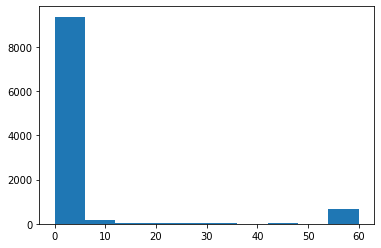

In [102]:
plt.hist(diffs)
plt.show()

In [129]:
# round datetime to nearest 5 mins 
weather_data_jfk['Date time'] = weather_data_jfk['Date time'].dt.round('5min')  

In [131]:
weather_data_jfk.shape

(10317, 9)

In [132]:
weather_data_jfk.drop_duplicates('Date time', keep='first').shape[0]

9524

In [133]:
10317 - 9524

793

In [136]:
weather_data_jfk.to_csv('/content/drive/My Drive/Bus Watcher Spec Project/Projects/Alex Amy + Sanket Shah/Data/Weather/vc_weather_data_jfk.csv')

# Clean Weatherstation DataFrame (LGA)

In [103]:
weather_data_lga = weather_df[weather_df['Contributing Stations'] == 'KLGA (11.0KM)']
weather_data_lga.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Contributing Stations,Weather Type,Conditions
3360,"New York, NY, United States",07/31/2021 23:30:00,22.0,22.0,22.0,NaN,NaN,0.0,NaN,11.2,NaN,16.0,0.0,60.46,KLGA (11.0KM),NaN,Clear
3361,"New York, NY, United States",07/31/2021 23:35:00,22.0,22.0,22.0,NaN,NaN,0.0,NaN,11.2,NaN,16.0,0.0,60.46,KLGA (11.0KM),NaN,Clear
3362,"New York, NY, United States",07/31/2021 23:40:00,22.0,22.0,22.0,NaN,NaN,0.0,NaN,11.2,NaN,16.0,0.0,60.46,KLGA (11.0KM),NaN,Clear
3363,"New York, NY, United States",07/31/2021 23:45:00,22.0,22.0,22.0,NaN,NaN,0.0,NaN,9.4,NaN,16.0,0.0,64.49,KLGA (11.0KM),NaN,Clear
3364,"New York, NY, United States",07/31/2021 23:50:00,22.0,22.0,22.0,NaN,NaN,0.0,NaN,9.4,NaN,16.0,NaN,64.49,KLGA (11.0KM),NaN,Clear


In [104]:
weather_data_lga = weather_data_lga.drop(columns=['Name', 'Maximum Temperature', 'Minimum Temperature', 'Wind Chill', 'Heat Index', 'Snow Depth', 'Contributing Stations', 'Weather Type'])

In [106]:
weather_data_lga.isna().sum() / weather_data_lga.shape[0]

Date time            0.000000
Temperature          0.000000
Precipitation        0.000000
Wind Speed           0.001331
Wind Gust            0.950756
Visibility           0.000000
Cloud Cover          0.054948
Relative Humidity    0.000000
Conditions           0.000000
dtype: float64

In [109]:
weather_data_lga[weather_data_lga['Wind Speed'].isna() == True]

,Date time,Temperature,Precipitation,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
6314,08/25/2021 15:51:00,33.9,0.0,NaN,NaN,16.0,88.0,37.28,Overcast
6687,09/07/2021 13:20:00,26.0,0.0,NaN,NaN,16.0,0.0,41.71,Clear
6717,09/07/2021 15:45:00,28.0,0.0,NaN,NaN,16.0,0.0,37.09,Clear
6736,09/07/2021 17:10:00,28.0,0.0,NaN,NaN,16.0,25.0,37.09,Clear
7735,09/10/2021 21:10:00,22.0,0.0,NaN,NaN,16.0,0.0,43.43,Clear
9176,09/15/2021 11:30:00,28.0,0.0,NaN,NaN,16.0,0.0,61.83,Clear
10199,09/18/2021 16:40:00,29.0,0.0,NaN,NaN,16.0,50.0,48.34,Partially cloudy
10477,09/19/2021 14:05:00,24.0,0.0,NaN,NaN,16.0,0.0,38.48,Clear
10480,09/19/2021 14:20:00,24.0,0.0,NaN,NaN,16.0,0.0,38.48,Clear
10790,09/20/2021 14:10:00,23.0,0.0,NaN,NaN,16.0,25.0,64.71,Clear


In [111]:
weather_data_lga[weather_data_lga['Wind Speed'].isna() == True].shape[0]

14

In [112]:
weather_data_lga[weather_data_lga['Wind Gust'].isna() == True]

,Date time,Temperature,Precipitation,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
3360,07/31/2021 23:30:00,22.0,0.0,11.2,NaN,16.0,0.0,60.46,Clear
3361,07/31/2021 23:35:00,22.0,0.0,11.2,NaN,16.0,0.0,60.46,Clear
3362,07/31/2021 23:40:00,22.0,0.0,11.2,NaN,16.0,0.0,60.46,Clear
3363,07/31/2021 23:45:00,22.0,0.0,9.4,NaN,16.0,0.0,64.49,Clear
3364,07/31/2021 23:50:00,22.0,0.0,9.4,NaN,16.0,NaN,64.49,Clear
...,...,...,...,...,...,...,...,...,...
13874,09/30/2021 23:45:00,15.0,0.0,13.0,NaN,16.0,0.0,58.78,Clear
13875,09/30/2021 23:50:00,15.0,0.0,11.2,NaN,16.0,0.0,58.78,Clear
13876,09/30/2021 23:51:00,15.0,0.0,11.2,NaN,16.0,0.0,57.98,Clear
13877,09/30/2021 23:55:00,15.0,0.0,9.4,NaN,16.0,0.0,58.78,Clear


In [113]:
weather_data_lga[weather_data_lga['Cloud Cover'].isna() == True]

,Date time,Temperature,Precipitation,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
3364,07/31/2021 23:50:00,22.0,0.0,9.4,NaN,16.0,NaN,64.49,Clear
3369,08/01/2021 00:10:00,22.0,0.0,11.2,NaN,16.0,NaN,60.46,Clear
3370,08/01/2021 00:15:00,22.0,0.0,9.4,NaN,16.0,NaN,60.46,Clear
3371,08/01/2021 00:20:00,22.0,0.0,11.2,NaN,16.0,NaN,60.46,Clear
3372,08/01/2021 00:25:00,22.0,0.0,11.2,NaN,16.0,NaN,60.46,Clear
...,...,...,...,...,...,...,...,...,...
13165,09/28/2021 03:50:00,21.0,0.0,20.5,NaN,16.0,NaN,60.22,Clear
13177,09/28/2021 04:45:00,21.0,0.0,18.4,NaN,16.0,NaN,60.22,Clear
13178,09/28/2021 04:50:00,21.0,0.0,16.6,NaN,16.0,NaN,60.22,Clear
13190,09/28/2021 05:45:00,21.0,0.0,13.0,NaN,16.0,NaN,60.22,Clear


In [114]:
weather_data_lga['Wind Speed'].fillna(0.0, inplace=True)
weather_data_lga['Wind Gust'].fillna(0.0, inplace=True)
weather_data_lga['Cloud Cover'].fillna(0.0, inplace=True)

In [115]:
weather_data_lga.shape

(10519, 9)

In [116]:
5 * 12 * 24 * 60

86400

In [117]:
weather_data_lga['Date time'] = pd.to_datetime(weather_data_lga['Date time'])

In [118]:
weather_data_lga['Date time'].min().date()

datetime.date(2021, 7, 31)

In [119]:
weather_data_lga['Date time'].max().date()

datetime.date(2021, 10, 1)

In [120]:
times = list(weather_data_lga['Date time'])
diffs = []
for i, next_time in enumerate(times[1:]):
  prior_time = times[i]
  diff = next_time - prior_time
  diff = diff.total_seconds() / 60
  if diff > 5:
    print(prior_time, next_time, diff)
  diffs.append(diff)

2021-08-08 19:55:00 2021-08-08 20:31:00 36.0
2021-08-08 20:31:00 2021-08-08 20:51:00 20.0
2021-08-08 20:51:00 2021-08-08 21:51:00 60.0
2021-08-08 21:51:00 2021-08-08 22:51:00 60.0
2021-08-08 22:51:00 2021-08-08 23:51:00 60.0
2021-08-08 23:51:00 2021-08-09 00:51:00 60.0
2021-08-09 00:51:00 2021-08-09 01:51:00 60.0
2021-08-09 01:51:00 2021-08-09 02:51:00 60.0
2021-08-09 02:51:00 2021-08-09 03:51:00 60.0
2021-08-09 03:51:00 2021-08-09 04:51:00 60.0
2021-08-09 04:51:00 2021-08-09 05:51:00 60.0
2021-08-09 05:51:00 2021-08-09 06:51:00 60.0
2021-08-09 06:51:00 2021-08-09 06:59:00 8.0
2021-08-09 06:59:00 2021-08-09 07:10:00 11.0
2021-08-09 07:10:00 2021-08-09 07:44:00 34.0
2021-08-09 07:44:00 2021-08-09 07:51:00 7.0
2021-08-09 07:51:00 2021-08-09 08:09:00 18.0
2021-08-09 08:09:00 2021-08-09 08:51:00 42.0
2021-08-09 08:51:00 2021-08-09 09:51:00 60.0
2021-08-09 09:51:00 2021-08-09 10:01:00 10.0
2021-08-09 10:01:00 2021-08-09 10:40:00 39.0
2021-08-09 10:40:00 2021-08-09 10:51:00 11.0
2021-08-09 1

(array([9657.,   53.,   36.,   37.,   22.,   14.,   20.,   25.,   13.,
         641.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <a list of 10 Patch objects>)

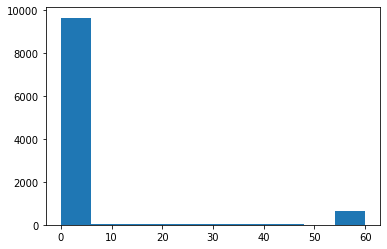

In [121]:
plt.hist(diffs)